In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.stats import gaussian_kde


In [2]:
# Load the 'glass' sheet from the uploaded excel file
df = pd.read_excel("glass.xlsx", sheet_name="glass")

In [3]:
df.shape

(214, 10)

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
target_col = "Type"
print(df[target_col].value_counts())

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64


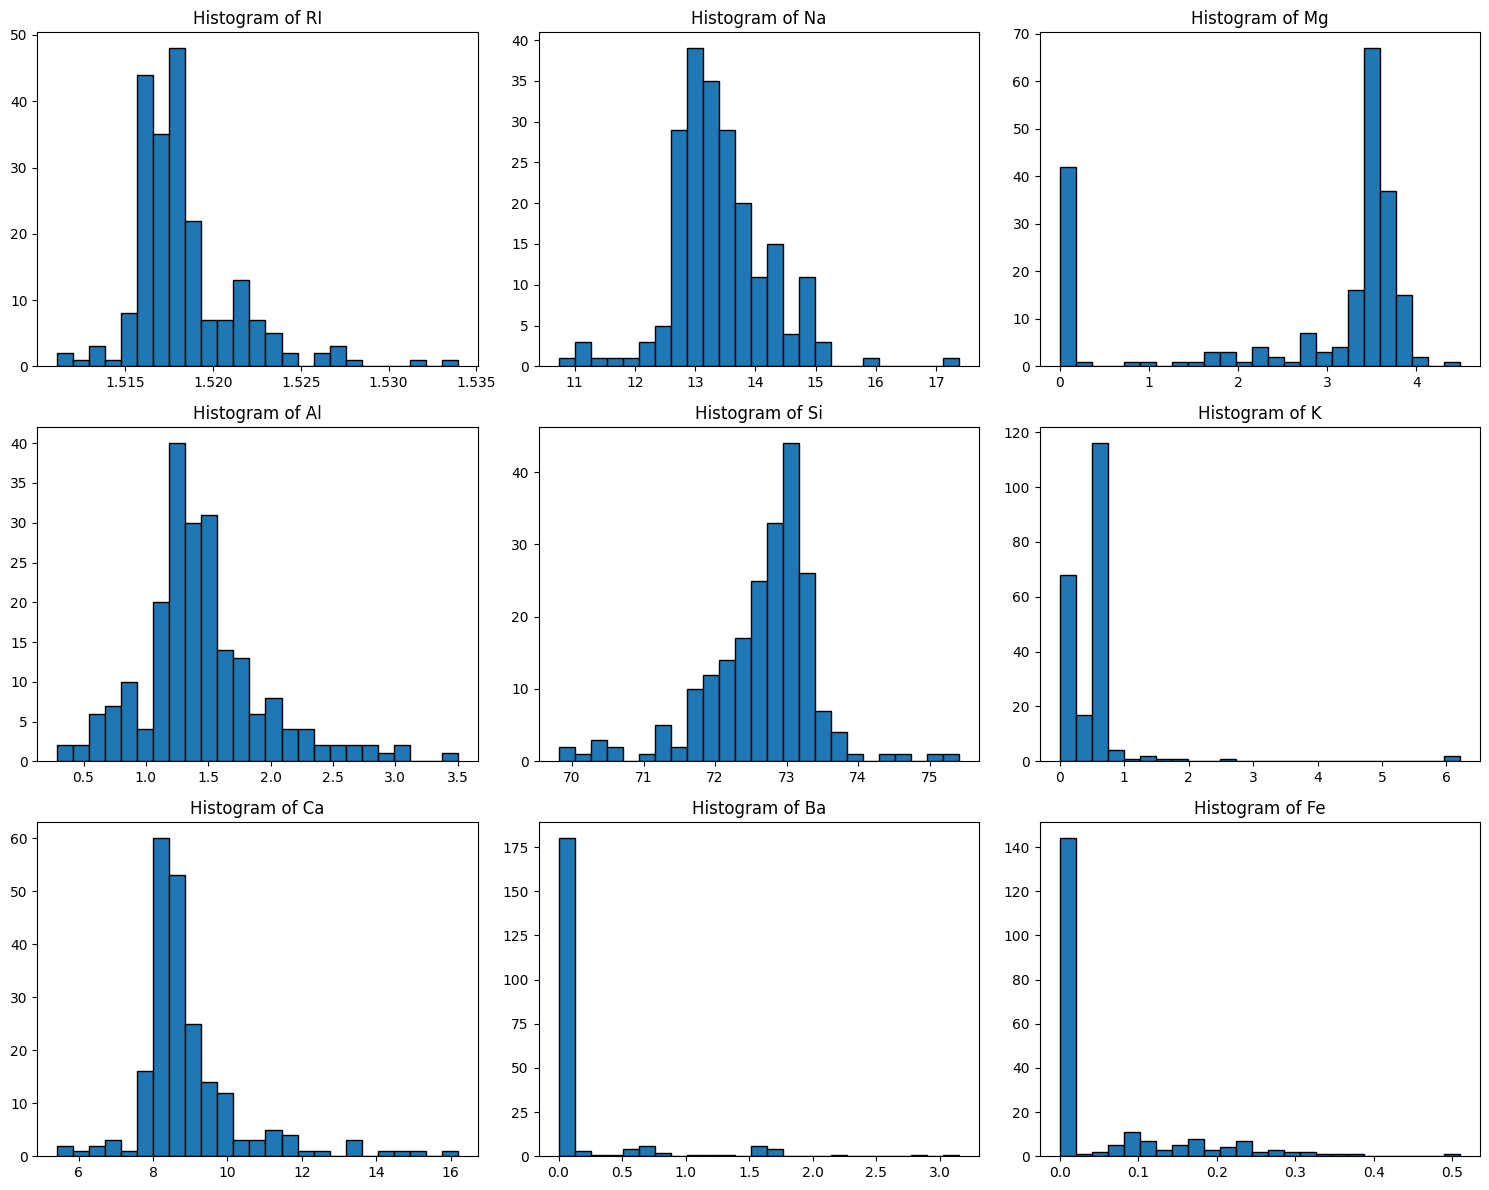

In [11]:
# Histogram
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove("Type")   # removing target
plt.figure(figsize=(15, 12))
rows = 3
cols = 3
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    plt.hist(df[col], bins=25, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
plt.show()


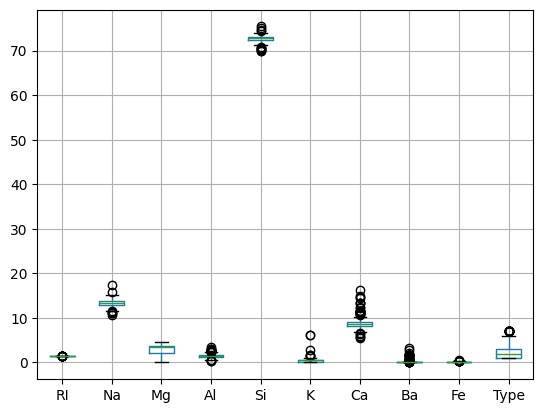

In [12]:
#Boxplot
df.boxplot()
plt.show()

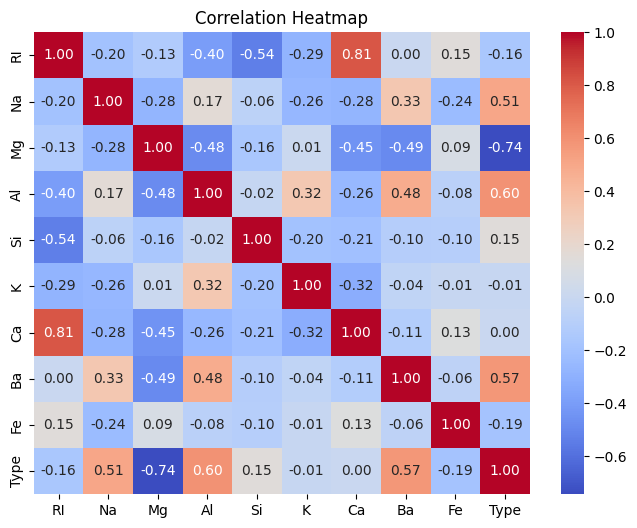

In [13]:
#Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [14]:
#Createing Feature(x) and Target(y)
x = df[numeric_cols]   # all numeric features
y = df["Type"]         # target column

In [15]:
#Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45, stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(170, 9)
(43, 9)
(170,)
(43,)


In [16]:
#Feature Scaling
std_sca = StandardScaler()

x_train[numeric_cols] = std_sca.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = std_sca.transform(x_test[numeric_cols])

In [17]:
#Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, random_state=40)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

accuracy_score(y_test,y_pred_rf)

0.7441860465116279

In [18]:
#Metrics Function
def get_scores(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, average='macro', zero_division=0),
        "recall": recall_score(y_true, y_pred, average='macro', zero_division=0),
        "f1": f1_score(y_true, y_pred, average='macro', zero_division=0),
    }

rf_scores = get_scores(y_test, y_pred_rf)
rf_scores

{'accuracy': 0.7441860465116279,
 'precision': 0.7287581699346406,
 'recall': 0.6968253968253967,
 'f1': 0.7066091954022989}

#### Bagging

In [19]:
#Bagging
bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=200,bootstrap=True,
                             max_features=0.9,bootstrap_features=True,max_samples=0.8,random_state=50)

In [20]:
bag_model.fit(x_train, y_train)
y_pred_bag = bag_model.predict(x_test)
bag_scores = get_scores(y_test, y_pred_bag)
bag_scores

{'accuracy': 0.7674418604651163,
 'precision': 0.738191632928475,
 'recall': 0.6793650793650793,
 'f1': 0.6928104575163397}

#### AdaBoost

In [21]:
# AdaBoost
ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),n_estimators=200,learning_rate=1.0,random_state=50)

In [22]:
ada_model.fit(x_train, y_train)
y_pred_ada = ada_model.predict(x_test)
ada_scores = get_scores(y_test, y_pred_ada)
ada_scores

{'accuracy': 0.7441860465116279,
 'precision': 0.7357142857142858,
 'recall': 0.5801587301587302,
 'f1': 0.6134920634920634}

#### Gradient Boosting

In [23]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,max_depth=3,random_state=50)

In [24]:
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)
gb_scores = get_scores(y_test, y_pred_gb)
gb_scores

{'accuracy': 0.7209302325581395,
 'precision': 0.8015873015873015,
 'recall': 0.6849206349206348,
 'f1': 0.7116883116883117}

In [25]:
#Summary Comparison Table
summary = pd.DataFrame({
    "RandomForest": rf_scores,
    "Bagging": bag_scores,
    "AdaBoost": ada_scores,
    "GradientBoosting": gb_scores
}).T

summary

,accuracy,precision,recall,f1
RandomForest,0.744186,0.728758,0.696825,0.706609
Bagging,0.767442,0.738192,0.679365,0.692810
AdaBoost,0.744186,0.735714,0.580159,0.613492
GradientBoosting,0.720930,0.801587,0.684921,0.711688


#### 1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging

* Trains multiple models on different bootstrap samples.

* Models work independently.

* Reduces variance.

* Example: Random Forest.

Boosting

* Models are trained sequentially, each fixing previous errors.

* Reduces bias.

* Focuses more on misclassified samples.

* Example: AdaBoost, Gradient Boosting.

Difference

* Bagging = parallel, reduces variance.

* Boosting = sequential, reduces bias.

#### 2. Explain how to handle imbalance in the data.
* Oversampling minority class (e.g., random oversampling, SMOTE).
* Undersampling majority class.
* Use class_weight='balanced' in models.
* Evaluate with precision, recall, F1-score, not just accuracy.